In [1]:
%pylab inline
plt.style.use('seaborn-whitegrid')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def point_to_point_traj(x1, x2, v1, v2, delta_t):
  t = np.linspace(0, delta_t, 100)  
  a0 = x1
  a1 = v1
  a2 = (3*x2 - 3*x1 - 2*v1*delta_t - v2 * delta_t) / (delta_t**2)
  a3 = (2*x1 + (v1 + v2) * delta_t  - 2 * x2) / (delta_t**3)

  polynomial = a0 + a1 * t + a2 * t**2 + a3 * t**3
  derivative = a1 + 2*a2 * t + 3 * a3 * t**2
  return polynomial, derivative


def piecewise2D (X,Y, Vx, Vy, T):
    theta_x, theta_y, dx, dy = [], [], [], []

    for i in range(len(P)-1):          
        theta_xi, dxi = point_to_point_traj(X[i], X[i+1], Vx[i], Vx[i+1], T[i+1] - T[i])
        theta_yi, dyi = point_to_point_traj(Y[i], Y[i+1], Vy[i], Vy[i+1], T[i+1] - T[i])

        theta_x += theta_xi.tolist()
        theta_y += theta_yi.tolist()
        dx += dxi.tolist()
        dy += dyi.tolist()

        plot(theta_xi, theta_yi)
    return theta_x, theta_y, dx, dy

In [3]:
# Plotting
def plot_points():
    plot(X,Y, '--')
    plot(X,Y, 'o')
    quiver(X,Y, Vx, Vy, color='r')
    
# Speed
def plot_speed():
    speed = np.sqrt(np.array(dx)**2 + np.array(dy)**2)
    plot(speed)

In [4]:
# Obstacles
def plot_rec(r):
    axis = gca()
    axis.add_patch(Rectangle(
        r[0],
        r[1],
        r[2],
        facecolor=r[3]
    ))

In [5]:
##### Requirements for the trajectory

# Waypoints
p1 = [-5,-7]
p2 = [10,-6]
p3 = [10,-3]
p4 = [0,-1]
p5 = [0,6]
p6 = [3,6]
p7 = [3,1]
p8 = [-1,1]
p9 = [-1,10]
p10 = [9,10]

# Velocities
v1 = [0.0001,0.]
v2 = [1,0]
v3 = [0,1]
v4 = [-1,0]
v5 = [0,1]
v6 = [1,0]
v7 = [0,-1]
v8 = [-1,0]
v9 = [0,1]
v10 = [0.0001,0]


# Time
t1 = 0
t2 = t1 + 3
t3 = t2 + 5
t4 = t3 + 5
t5 = t4 + 3
t6 = t5 + 5
t7 = t6 + 5
t8 = t7 + 2
t9 = t8 + 2
t10 = t9 + 20

In [6]:
# Obstacles info

r1 = ((4, -1), 2, 10, 'k')
r2 = ((0.5, 2), 2, 3, 'b')
r3 = ((-6, -5), 15, 1, 'k')
r4 = ((8, 0), 2, 5, 'k')
r5 = ((-4, -3), 2, 8, 'k')

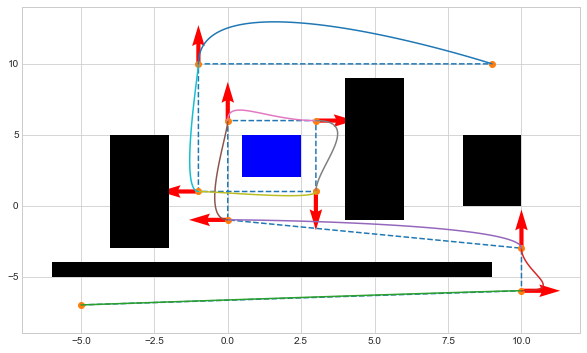

In [7]:
# Convert the initial conditions to a vector form
P = np.vstack((p1, p2, p3, p4, p5, p6, p7, p8, p9, p10))
V = np.vstack((v1, v2, v3, v4, v5, v6, v7, v8, v9, v10))
T = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10]

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]

# gca().set_aspect("equal")
ylim((-9,14))
xlim((-7,12))

plot_rec(r1)
plot_rec(r2)
plot_rec(r3)
plot_rec(r4)
plot_rec(r5)

plot_points()

# Piecewise function
theta_x, theta_y, dx, dy = piecewise2D(X,Y, Vx, Vy, T)